In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30036 entries, 0 to 30035
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        30036 non-null  int64
 1   having_IPhaving_IP_Address   30036 non-null  int64
 2   URLURL_Length                30036 non-null  int64
 3   Shortining_Service           30036 non-null  int64
 4   having_At_Symbol             30036 non-null  int64
 5   double_slash_redirecting     30036 non-null  int64
 6   Prefix_Suffix                30036 non-null  int64
 7   having_Sub_Domain            30036 non-null  int64
 8   SSLfinal_State               30036 non-null  int64
 9   Domain_registeration_length  30036 non-null  int64
 10  Favicon                      30036 non-null  int64
 11  port                         30036 non-null  int64
 12  HTTPS_token                  30036 non-null  int64
 13  Request_URL                  30036 non-null  i

In [78]:
dataset

index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0          1                          -1              1                   1   
1          2                           1              1                   1   
2          3                           1              0                   1   
3          4                           1              0                   1   
4          5                           1              0                  -1   
...      ...                         ...            ...                 ...   
30031   6218                           1             -1                   1   
30032   6219                          -1             -1                  -1   
30033   6220                          -1              1                   1   
30034   6221                          -1             -1                   1   
30035   6222                           1              1                   1   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                     1                        -1             -1   
1                     1                         1             -1   
2                     1                         1             -1   
3                     1                         1             -1   
4                     1                         1             -1   
...                 ...                       ...            ...   
30031                 1                         1             -1   
30032                 1                        -1             -1   
30033                 1                         1             -1   
30034                 1                         1             -1   
30035                 1                         1             -1   

       having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                     -1              -1                           -1  ...   
1                      0               1                           -1  ...   
2                     -1              -1                           -1  ...   
3                     -1              -1                            1  ...   
4                      1               1                           -1  ...   
...                  ...             ...                          ...  ...   
30031                 -1               1                           -1  ...   
30032                  0               0                            1  ...   
30033                  0               0                           -1  ...   
30034                 -1               1                           -1  ...   
30035                 -1              -1                            1  ...   

       popUpWidnow  Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  \
0                1       1             -1         -1           -1         -1   
1                1       1             -1         -1            0         -1   
2                1       1              1         -1            1         -1   
3                1       1             -1         -1            1         -1   
4               -1       1             -1         -1            0         -1   
...            ...     ...            ...        ...          ...        ...   
30031            1       1             -1          1            0         -1   
30032           -1       1             -1         -1           -1         -1   
30033            1       1              1          1           -1         -1   
30034            1       1             -1          1            0          1   
30035            1       1              1          1            0         -1   

       Google_Index  Links_pointing_to_page  Statistical_report  Result  
0                 1                       1                  -1      -1  
1                 1                       1                   1      -1  
2                 1                       0                  -1      -1  
3                 1                      -1    

In [5]:
print('Finding missing values')
print(dataset.isnull().sum())

Finding missing values
index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_pa

Text(0.5, 1.0, 'Count of each Target Class')

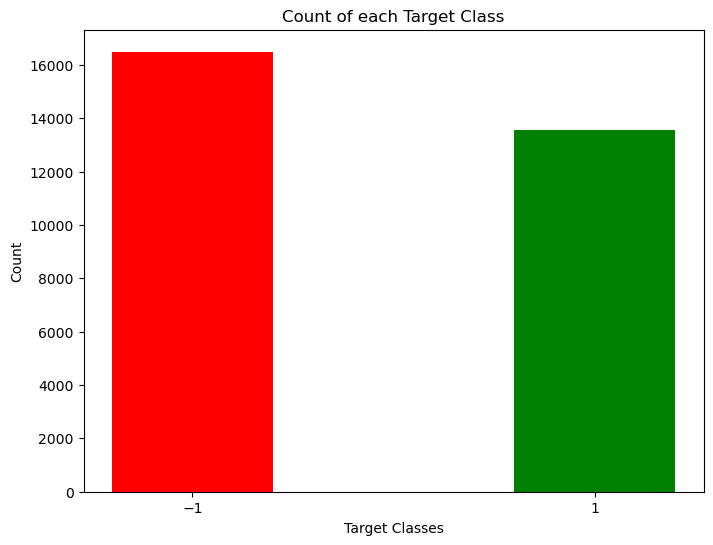

In [6]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['Result'].unique(), dataset['Result'].value_counts(), color = ['red', 'green'])
plt.xticks([-1, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [7]:
y = dataset['Result']
X = dataset.drop(['index'], axis = 1)
X = X.drop(['Iframe'], axis = 1)
X = X.drop(['Submitting_to_email'], axis = 1)
X = X.drop(['Result'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
y = dataset['Result']
X = dataset.drop(['Result'], axis = 1)

In [8]:
rf=RandomForestClassifier(n_estimators=40,oob_score=True)

In [9]:
#Train the model using the training sets
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, oob_score=True)

In [10]:
#Predict the response for test dataset
y_pred = rf.predict(X_test)
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==1:
        res='Legitimate'
    elif y_pred[i]==-1:
        res='Phishing'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Legitimate
Test data  1  is  Phishing
Test data  2  is  Legitimate
Test data  3  is  Legitimate
Test data  4  is  Legitimate
Test data  5  is  Phishing
Test data  6  is  Phishing
Test data  7  is  Phishing
Test data  8  is  Legitimate
Test data  9  is  Legitimate
Test data  10  is  Phishing
Test data  11  is  Phishing
Test data  12  is  Phishing
Test data  13  is  Legitimate
Test data  14  is  Phishing
Test data  15  is  Legitimate
Test data  16  is  Legitimate
Test data  17  is  Legitimate
Test data  18  is  Legitimate
Test data  19  is  Phishing
Test data  20  is  Phishing
Test data  21  is  Legitimate
Test data  22  is  Phishing
Test data  23  is  Legitimate
Test data  24  is  Legitimate
Test data  25  is  Phishing
Test data  26  is  Phishing
Test data  27  is  Legitimate
Test data  28  is  Legitimate
Test data  29  is  Phishing
Test data  30  is  Phishing
Test data  31  is  Legitimate
Test data  32  is  Phishing
Test data  33  is  Legitimate
Test data  34  is  Leg

In [11]:
print(confusion_matrix(y_test,y_pred))

[[3391   51]
 [  36 4031]]


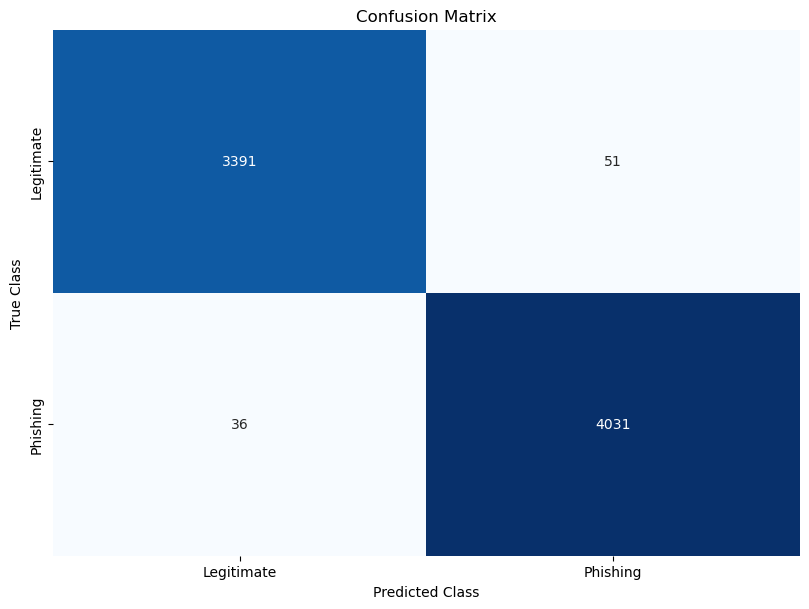

In [17]:
class_names = ['Legitimate', 'Phishing']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [18]:
from sklearn import metrics
print("Accuracy for Random Forest Classifier : {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Random Forest Classifier : 98.84139033160207%


In [22]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
xgb = XGBClassifier()
estimators = []
estimators.append(('xgb', xgb))
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))])

In [23]:
y_pred = ensemble.predict(X_test)
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==1:
        res='Legitimate'
    elif y_pred[i]==-1:
        res='Phishing'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Legitimate
Test data  1  is  Phishing
Test data  2  is  Legitimate
Test data  3  is  Legitimate
Test data  4  is  Legitimate
Test data  5  is  Phishing
Test data  6  is  Phishing
Test data  7  is  Phishing
Test data  8  is  Legitimate
Test data  9  is  Legitimate
Test data  10  is  Phishing
Test data  11  is  Phishing
Test data  12  is  Phishing
Test data  13  is  Legitimate
Test data  14  is  Phishing
Test data  15  is  Legitimate
Test data  16  is  Legitimate
Test data  17  is  Legitimate
Test data  18  is  Legitimate
Test data  19  is  Phishing
Test data  20  is  Phishing
Test data  21  is  Legitimate
Test data  22  is  Phishing
Test data  23  is  Legitimate
Test data  24  is  Legitimate
Test data  25  is  Phishing
Test data  26  is  Phishing
Test data  27  is  Legitimate
Test data  28  is  Legitimate
Test data  29  is  Phishing
Test data  30  is  Phishing
Test data  31  is  Legitimate
Test data  32  is  Phishing
Test data  33  is  Legitimate
Test data  34  is  Leg

In [24]:
print(confusion_matrix(y_test,y_pred))

[[3358   84]
 [  48 4019]]


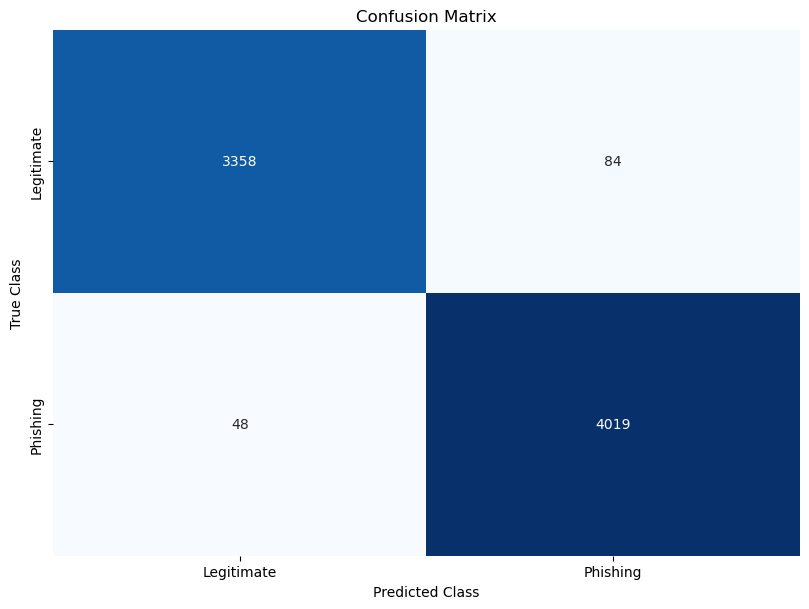

In [26]:
class_names = ['Legitimate', 'Phishing']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [29]:
print("Accuracy for XgBoost Classifier is {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for XgBoost Classifier is 98.24210946863764%


In [32]:
SGD = GradientBoostingClassifier(learning_rate=0.1)
SGD.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
y_pred = SGD.predict(X_test)
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==1:
        res='Legitimate'
    elif y_pred[i]==-1:
        res='Phishing'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Legitimate
Test data  1  is  Phishing
Test data  2  is  Legitimate
Test data  3  is  Legitimate
Test data  4  is  Legitimate
Test data  5  is  Phishing
Test data  6  is  Phishing
Test data  7  is  Phishing
Test data  8  is  Legitimate
Test data  9  is  Legitimate
Test data  10  is  Phishing
Test data  11  is  Phishing
Test data  12  is  Phishing
Test data  13  is  Legitimate
Test data  14  is  Phishing
Test data  15  is  Phishing
Test data  16  is  Legitimate
Test data  17  is  Legitimate
Test data  18  is  Legitimate
Test data  19  is  Phishing
Test data  20  is  Phishing
Test data  21  is  Legitimate
Test data  22  is  Phishing
Test data  23  is  Legitimate
Test data  24  is  Legitimate
Test data  25  is  Phishing
Test data  26  is  Phishing
Test data  27  is  Legitimate
Test data  28  is  Legitimate
Test data  29  is  Phishing
Test data  30  is  Phishing
Test data  31  is  Legitimate
Test data  32  is  Phishing
Test data  33  is  Legitimate
Test data  34  is  Legit

In [35]:
print(confusion_matrix(y_test,y_pred))

[[3224  218]
 [ 139 3928]]


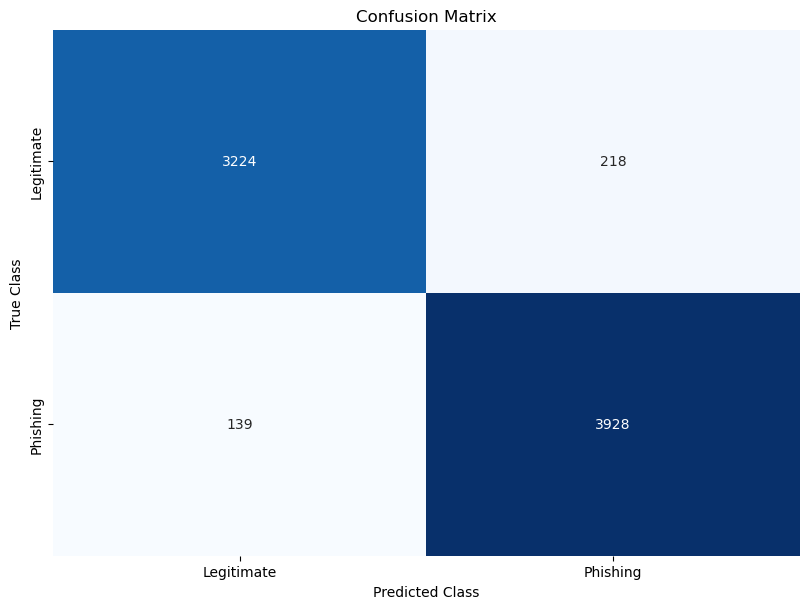

In [38]:
class_names = ['Legitimate', 'Phishing']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [41]:
print("Accuracy for SGD Classifier : {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for SGD Classifier : 95.24570515381542%


In [42]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [43]:
y_pred = abc.predict(X_test)
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==1:
        res='Legitimate'
    elif y_pred[i]==-1:
        res='Phishing'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Legitimate
Test data  1  is  Phishing
Test data  2  is  Legitimate
Test data  3  is  Legitimate
Test data  4  is  Legitimate
Test data  5  is  Phishing
Test data  6  is  Phishing
Test data  7  is  Phishing
Test data  8  is  Legitimate
Test data  9  is  Legitimate
Test data  10  is  Phishing
Test data  11  is  Phishing
Test data  12  is  Phishing
Test data  13  is  Legitimate
Test data  14  is  Phishing
Test data  15  is  Phishing
Test data  16  is  Legitimate
Test data  17  is  Legitimate
Test data  18  is  Legitimate
Test data  19  is  Phishing
Test data  20  is  Phishing
Test data  21  is  Legitimate
Test data  22  is  Phishing
Test data  23  is  Legitimate
Test data  24  is  Legitimate
Test data  25  is  Phishing
Test data  26  is  Phishing
Test data  27  is  Legitimate
Test data  28  is  Legitimate
Test data  29  is  Phishing
Test data  30  is  Phishing
Test data  31  is  Legitimate
Test data  32  is  Phishing
Test data  33  is  Legitimate
Test data  34  is  Legit

In [44]:
print(confusion_matrix(y_test,y_pred))

[[2542  214]
 [ 152 3100]]


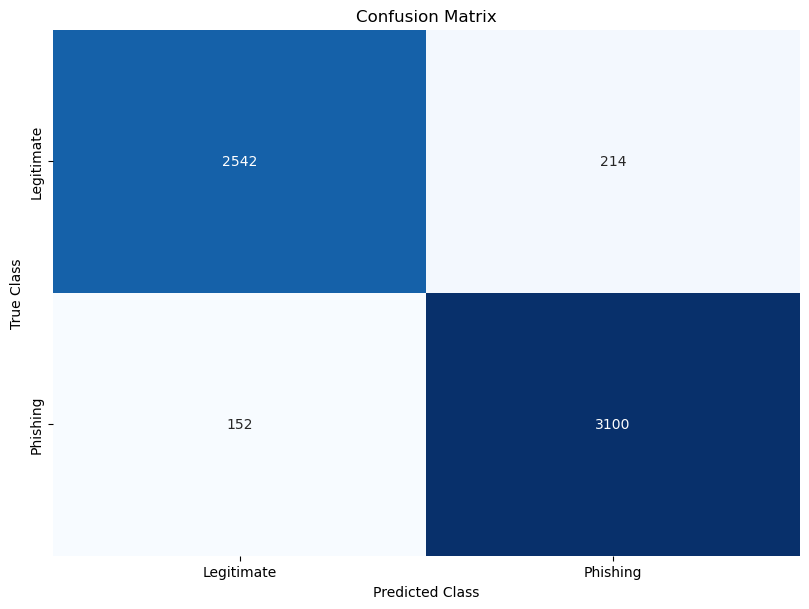

In [45]:
class_names = ['Legitimate', 'Phishing']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [46]:
print("Accuracy for Ada Boost Classifier 1 is {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Ada Boost Classifier 1 is 93.9081225033289%


In [47]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(iterations=2,learning_rate=1)
cbc.fit(X_train, y_train)

0:	learn: 0.1854840	total: 134ms	remaining: 134ms
1:	learn: 0.1384532	total: 158ms	remaining: 0us


In [48]:
y_pred = cbc.predict(X_test)
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==1:
        res='Legitimate'
    elif y_pred[i]==-1:
        res='Phishing'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Legitimate
Test data  1  is  Phishing
Test data  2  is  Legitimate
Test data  3  is  Legitimate
Test data  4  is  Legitimate
Test data  5  is  Phishing
Test data  6  is  Phishing
Test data  7  is  Phishing
Test data  8  is  Legitimate
Test data  9  is  Legitimate
Test data  10  is  Phishing
Test data  11  is  Phishing
Test data  12  is  Phishing
Test data  13  is  Legitimate
Test data  14  is  Phishing
Test data  15  is  Legitimate
Test data  16  is  Legitimate
Test data  17  is  Legitimate
Test data  18  is  Legitimate
Test data  19  is  Phishing
Test data  20  is  Phishing
Test data  21  is  Legitimate
Test data  22  is  Phishing
Test data  23  is  Legitimate
Test data  24  is  Legitimate
Test data  25  is  Phishing
Test data  26  is  Phishing
Test data  27  is  Legitimate
Test data  28  is  Legitimate
Test data  29  is  Phishing
Test data  30  is  Phishing
Test data  31  is  Legitimate
Test data  32  is  Phishing
Test data  33  is  Legitimate
Test data  34  is  Leg

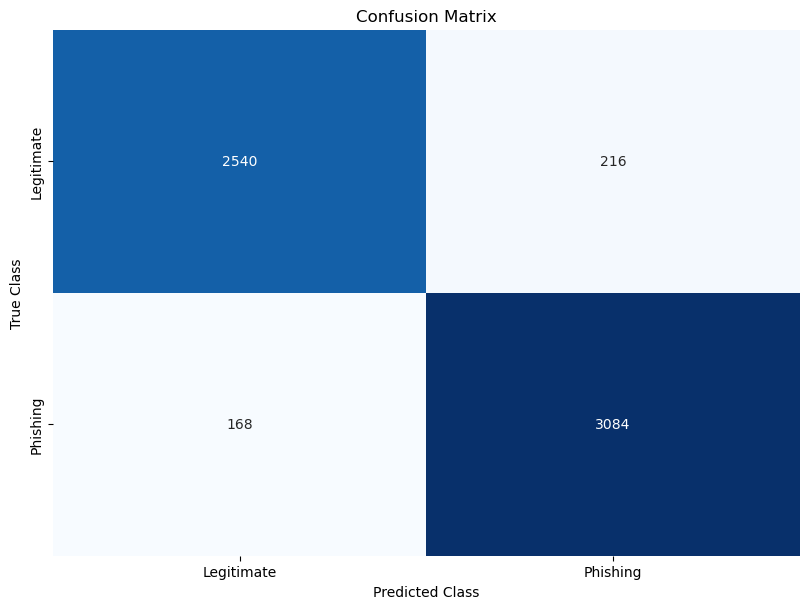

In [49]:
class_names = ['Legitimate', 'Phishing']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [50]:
print("Accuracy for Cat Boost Classifier 1 is {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Cat Boost Classifier 1 is 93.60852197070572%


In [53]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier(n_estimators=40,oob_score=True)
clf = BaggingClassifier(n_estimators = 40, random_state = 22)
xgb = XGBClassifier()
estimators = []
estimators.append(('rf', rf))
estimators.append(('xgb', xgb))
estimators.append(('clf', clf))
#estimators.append(('ada', ada))
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=40,
                                                     oob_score=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('clf',
                              BaggingClassifier(n_estimators=40,
                                                random_state=22))])

In [57]:
y_pred = ensemble.predict(X_test)
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==1:
        res='Legitimate'
    elif y_pred[i]==-1:
        res='Phishing'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Legitimate
Test data  1  is  Phishing
Test data  2  is  Legitimate
Test data  3  is  Legitimate
Test data  4  is  Legitimate
Test data  5  is  Phishing
Test data  6  is  Phishing
Test data  7  is  Phishing
Test data  8  is  Legitimate
Test data  9  is  Legitimate
Test data  10  is  Phishing
Test data  11  is  Phishing
Test data  12  is  Phishing
Test data  13  is  Legitimate
Test data  14  is  Phishing
Test data  15  is  Legitimate
Test data  16  is  Legitimate
Test data  17  is  Legitimate
Test data  18  is  Legitimate
Test data  19  is  Phishing
Test data  20  is  Phishing
Test data  21  is  Legitimate
Test data  22  is  Phishing
Test data  23  is  Legitimate
Test data  24  is  Legitimate
Test data  25  is  Phishing
Test data  26  is  Phishing
Test data  27  is  Legitimate
Test data  28  is  Legitimate
Test data  29  is  Phishing
Test data  30  is  Phishing
Test data  31  is  Legitimate
Test data  32  is  Phishing
Test data  33  is  Legitimate
Test data  34  is  Leg

In [58]:
print(confusion_matrix(y_test,y_pred))

[[2744   12]
 [  10 3242]]


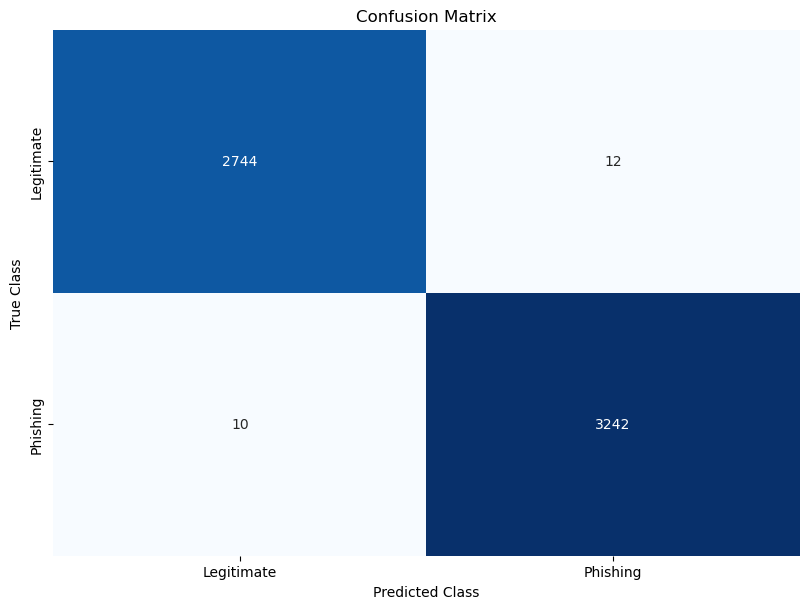

In [59]:
class_names = ['Legitimate', 'Phishing']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [60]:
print("Accuracy for Voting Classifier is {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Voting Classifier is 99.63382157123834%
